In [18]:
import numpy as np
import cv2
import util
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [4]:
path = "DATA3/videos2/"

imgs_rgb, imgs_ir = util.loadDataset(path, "RGB_thresh", "IR_thresh")

(320, 240)

In [17]:
res = rotate_image(imgs_rgb[0], 95)

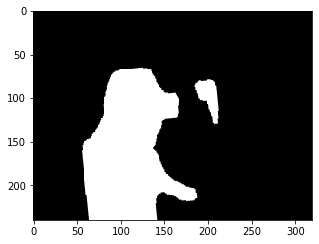

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(res, cmap='gray')

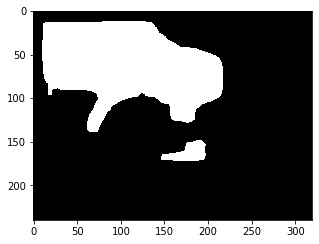

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(imgs_rgb[0], cmap='gray')

In [21]:
imgs_rgb_to, imgs_ir = util.loadDataset(path, "RGB_to_thresh", "IR_thresh")

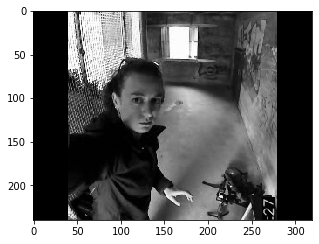

In [24]:
res = rotate_image(imgs_rgb_to[0], 90)
plt.figure(figsize=(5,5))
plt.imshow(res, cmap='gray')

In [23]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [29]:
res = rotate_bound(imgs_rgb_to[0], -90)

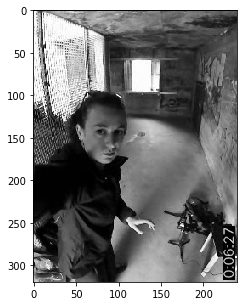

In [30]:
plt.figure(figsize=(5,5))
plt.imshow(res, cmap='gray')

In [31]:
res.shape

(320, 240)

In [36]:
imgs_rotate = []
for i in range(0, imgs_rgb.shape[0]):
    res = rotate_image(imgs_rgb[i], 90)
    imgs_rotate.append(res)
    
imgs_rotate = np.array(imgs_rotate)

In [37]:
imgs_rotate.shape

(6754, 240, 320)

In [38]:
util.saveImages(imgs_rotate, path+"RGB_thresh_rotate")